In [1]:
import networkx as nx
import osmnx as ox

%matplotlib inline
ox.__version__

'1.1.2'

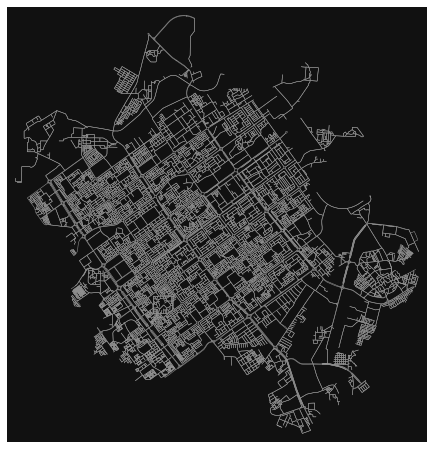

In [21]:




# you can get networks anywhere in the world
G = ox.graph_from_place("Chandigarh, India", network_type="drive")
fig, ax = ox.plot_graph(G, node_size=0, edge_linewidth=0.5)



In [22]:
u = []
v = []
key = []
data = []
for uu, vv, kkey, ddata in G.edges(keys=True, data=True):
    u.append(uu)
    v.append(vv)
    key.append(kkey)
    data.append(ddata) 

In [23]:
# Lists to store colors and widths 
roadColors = []
roadWidths = []

for item in data:
    if "length" in item.keys():
        if item["length"] <= 100:
            linewidth = 0.10
            color = "#a6a6a6" 
            
        elif item["length"] > 100 and item["length"] <= 200:
            linewidth = 0.15
            color = "#676767"
            
        elif item["length"] > 200 and item["length"] <= 400:
            linewidth = 0.25
            color = "#454545"
            
        elif item["length"] > 400 and item["length"] <= 800:
            color = "#bdbdbd"
            linewidth = 0.35
        else:
            color = "#d5d5d5"
            linewidth = 0.45

        if "primary" in item["highway"]:
            linewidth = 0.5
            color = "#ffff"
    else:
        color = "#a6a6a6"
        linewidth = 0.10
            
    roadColors.append(color)
    roadWidths.append(linewidth)

In [24]:
for item in data:
    if "footway" in item["highway"]:
        color = "#ededed"
        linewidth = 0.25
    else:
        color = "#a6a6a6"
        linewidth = 0.5
        
    roadWidths.append(linewidth)

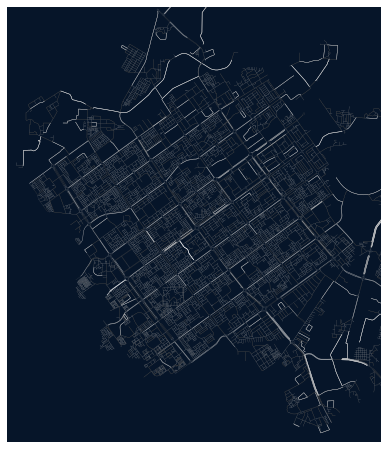

In [29]:
#Center of the map  
latitude = 30.727298007400538
longitude = 76.76749964067984

#Limit borders 
north = latitude + 0.06
south = latitude - 0.06
east = longitude + 0.06
west = longitude - 0.06

bgcolor = "#061529"

fig, ax = ox.plot_graph(G, node_size=0, bbox = (north, south, east, west),
                        dpi = 300,bgcolor = bgcolor,
                        save = False, edge_color=roadColors,
                        edge_linewidth=roadWidths, edge_alpha=1)

fig.tight_layout(pad=0)
#fig.savefig("madrid.png", dpi=300, bbox_inches='tight', format="png", 
#            facecolor=fig.get_facecolor(), transparent=False)

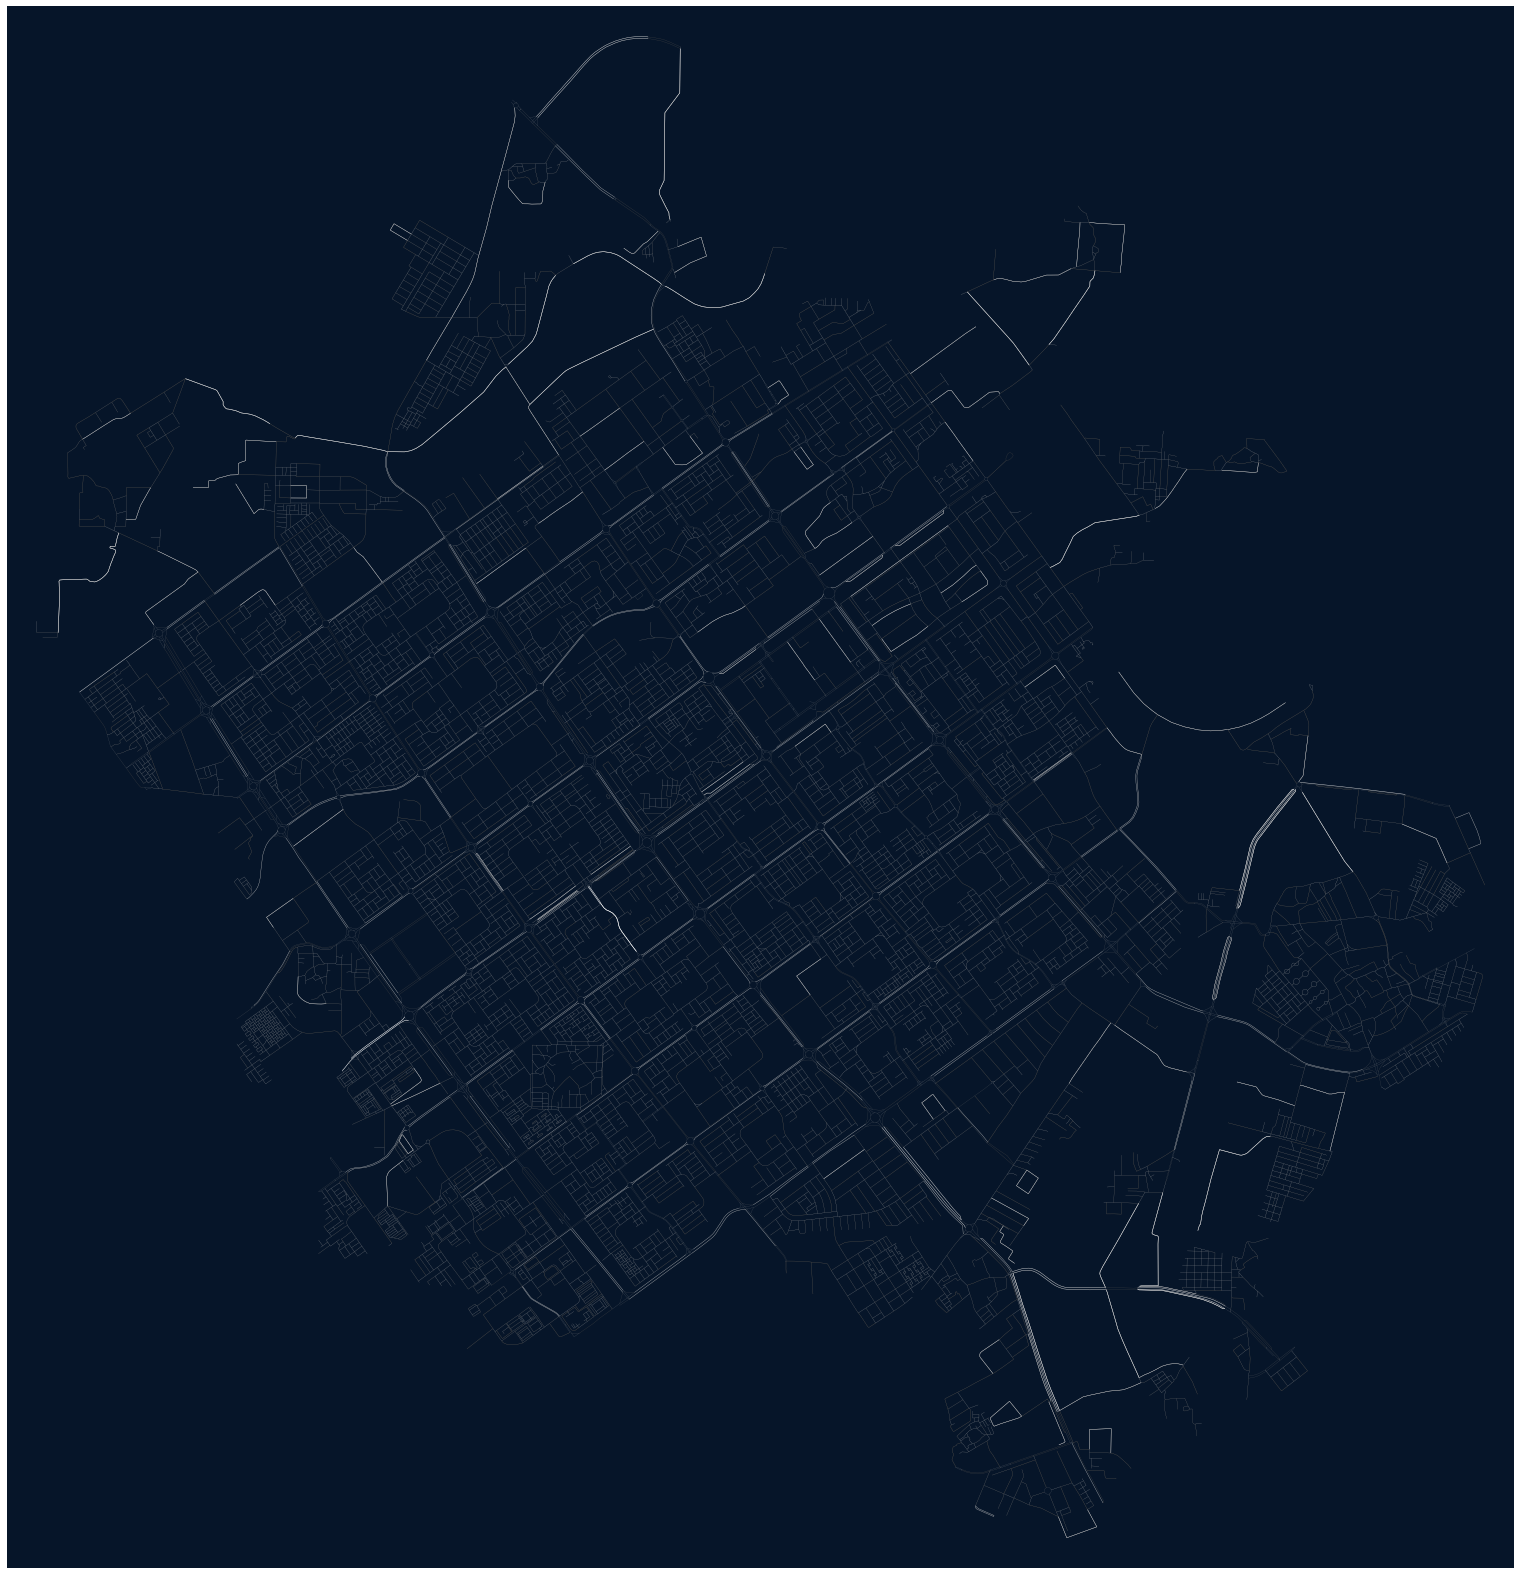

In [30]:
fig, ax = ox.plot_graph(G, node_size=0,figsize=(27, 40), 
                        dpi = 300,bgcolor = bgcolor,
                        save = False, edge_color=roadColors,
                        edge_linewidth=roadWidths, edge_alpha=1)

fig.tight_layout(pad=0)

In [31]:
import networkx as nx
import osmnx as ox

center_point = (30.727298007400538, 76.76749964067984)

G1 = ox.graph_from_point(center_point, dist=15000, dist_type='bbox', network_type='all', 
                         simplify=True, retain_all=True, truncate_by_edge=False, 
                         clean_periphery=False, custom_filter='["natural"~"water"]')

G2 = ox.graph_from_point(center_point, dist=15000, dist_type='bbox', network_type='all', 
                         simplify=True, retain_all=True, truncate_by_edge=False, 
                         clean_periphery=False, custom_filter='["waterway"~"river"]')

Gwater = nx.compose(G1, G2)

/Applications/anaconda3/envs/osmnx/lib/python3.8/site-packages/osmnx/graph.py:478: UserWarning: the graph-level street_count attribute will likely be inaccurate when you set clean_periphery=False
  warnings.warn(msg)
/Applications/anaconda3/envs/osmnx/lib/python3.8/site-packages/osmnx/graph.py:478: UserWarning: the graph-level street_count attribute will likely be inaccurate when you set clean_periphery=False
  warnings.warn(msg)


In [32]:
u = []
v = []
key = []
data = []
for uu, vv, kkey, ddata in Gwater.edges(keys=True, data=True):
    u.append(uu)
    v.append(vv)
    key.append(kkey)
    data.append(ddata)    


# List to store colors
roadColors = []
roadWidths = []

# #72b1b1
# #5dc1b9
for item in data:
    if "name" in item.keys():
        if item["length"] > 400: 
            color = "#72b1b1"
            linewidth = 2
        else:
            color = "#72b1b1"
            linewidth = 0.5
    else:
        color = "#72b1b1"
        linewidth = 0.5
        
    roadColors.append(color)  
    roadWidths.append(linewidth)

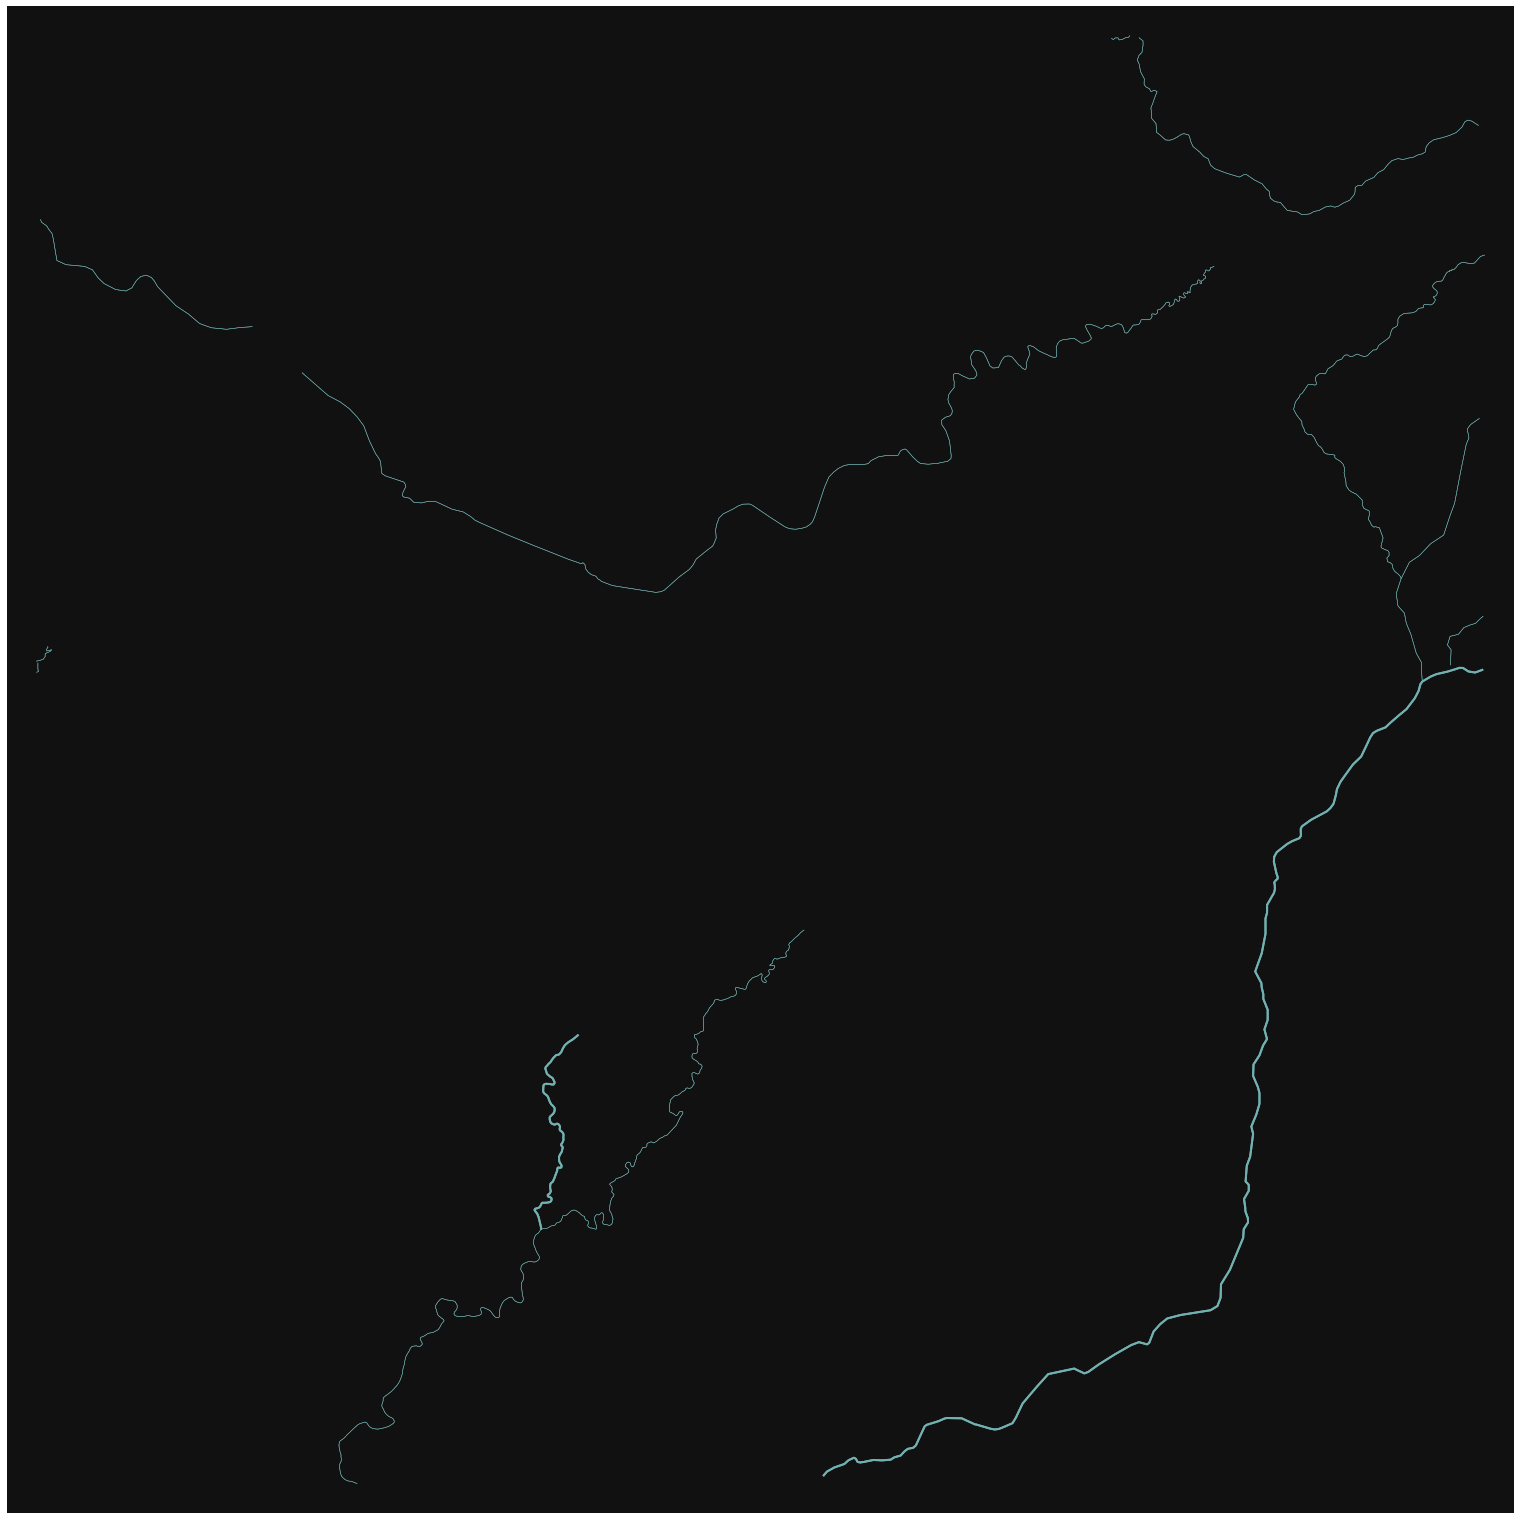

In [33]:
fig, ax = ox.plot_graph(Gwater, node_size=0,figsize=(27, 40), 
                        dpi = 300, save = False, edge_color=roadColors,
                        edge_linewidth=roadWidths, edge_alpha=1)

fig.tight_layout(pad=0)